# Customer Churn Prediction at Lloyds Banking Group
Objective:
Develop a machine learning solution to identify Llyod Banking Group customers at high risk of churning, particularly young professionals and small business owners mand recommend targeted interventions to improve retention.

## Data Exploration

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df=pd.read_excel(r"C:\Users\Ivan\Downloads\Customer_Churn_Data_Large.xlsx", sheet_name=None)
df

{'Customer_Demographics':      CustomerID  Age Gender MaritalStatus IncomeLevel
 0             1   62      M        Single         Low
 1             2   65      M       Married         Low
 2             3   18      M        Single         Low
 3             4   21      M       Widowed         Low
 4             5   21      M      Divorced      Medium
 ..          ...  ...    ...           ...         ...
 995         996   54      F        Single         Low
 996         997   19      M       Widowed        High
 997         998   47      M       Married         Low
 998         999   23      M       Widowed        High
 999        1000   34      M       Widowed         Low
 
 [1000 rows x 5 columns],
 'Transaction_History':       CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
 0              1           7194      2022-03-27       416.50     Electronics
 1              2           7250      2022-08-08        54.96        Clothing
 2              2           96

In [14]:
print(df.keys())

dict_keys(['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status'])


In [15]:
df_demo = df['Customer_Demographics']
df_trans = df['Transaction_History']
df_service = df['Customer_Service']
df_online = df['Online_Activity']
df_churn = df['Churn_Status']

In [16]:
df_merge = df_demo.merge(df_churn, on='CustomerID', how='left') \
                    .merge(df_online, on='CustomerID', how='left') \
                    .merge(df_trans, on='CustomerID', how='left') \
                    .merge(df_service, on='CustomerID', how='left')
df_merge

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,LastLoginDate,LoginFrequency,ServiceUsage,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,62,M,Single,Low,0,2023-10-21,34,Mobile App,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved
1,2,65,M,Married,Low,1,2023-12-05,5,Website,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved
2,2,65,M,Married,Low,1,2023-12-05,5,Website,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved
3,2,65,M,Married,Low,1,2023-12-05,5,Website,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved
4,2,65,M,Married,Low,1,2023-12-05,5,Website,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,34,M,Widowed,Low,0,2023-08-13,22,Mobile App,2724,2022-09-08,232.06,Groceries,NaN,NaT,NaN,NaN
6808,1000,34,M,Widowed,Low,0,2023-08-13,22,Mobile App,2917,2022-12-13,324.98,Books,NaN,NaT,NaN,NaN
6809,1000,34,M,Widowed,Low,0,2023-08-13,22,Mobile App,2979,2022-06-15,375.34,Groceries,NaN,NaT,NaN,NaN
6810,1000,34,M,Widowed,Low,0,2023-08-13,22,Mobile App,8594,2022-04-08,166.73,Books,NaN,NaT,NaN,NaN


### Basic Insight

In [18]:
df_merge.dtypes

CustomerID                   int64
Age                          int64
Gender                      object
MaritalStatus               object
IncomeLevel                 object
ChurnStatus                  int64
LastLoginDate       datetime64[ns]
LoginFrequency               int64
ServiceUsage                object
TransactionID                int64
TransactionDate     datetime64[ns]
AmountSpent                float64
ProductCategory             object
InteractionID              float64
InteractionDate     datetime64[ns]
InteractionType             object
ResolutionStatus            object
dtype: object

In [19]:
# Provides the statistical summary of all the columns
df_merge.describe(include="all")

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,LastLoginDate,LoginFrequency,ServiceUsage,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus
count,6812.000000,6812.000000,6812,6812,6812,6812.000000,6812,6812.000000,6812,6812.000000,6812,6812.000000,6812,5204.000000,5204,5204,5204
unique,NaN,NaN,2,4,3,NaN,NaN,NaN,3,NaN,NaN,NaN,5,NaN,NaN,3,2
top,NaN,NaN,F,Widowed,High,NaN,NaN,NaN,Online Banking,NaN,NaN,NaN,Books,NaN,NaN,Feedback,Resolved
freq,NaN,NaN,3580,1896,2340,NaN,NaN,NaN,2419,NaN,NaN,NaN,1408,NaN,NaN,1921,2693
mean,500.169260,43.274516,NaN,NaN,NaN,0.198473,2023-07-06 04:56:47.633587712,25.724310,NaN,5497.323253,2022-07-01 02:11:29.136817408,251.620527,NaN,5921.861261,2022-07-01 16:31:10.561106944,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,0.000000,2023-01-01 00:00:00,1.000000,NaN,1000.000000,2022-01-01 00:00:00,5.180000,NaN,2015.000000,2022-01-01 00:00:00,NaN,NaN
25%,247.000000,30.000000,NaN,NaN,NaN,0.000000,2023-04-12 00:00:00,14.000000,NaN,3223.500000,2022-04-02 00:00:00,127.100000,NaN,3873.250000,2022-04-07 00:00:00,NaN,NaN
50%,505.500000,44.000000,NaN,NaN,NaN,0.000000,2023-07-13 00:00:00,26.000000,NaN,5515.000000,2022-07-01 00:00:00,251.845000,NaN,5903.000000,2022-07-02 00:00:00,NaN,NaN
75%,750.000000,56.000000,NaN,NaN,NaN,0.000000,2023-10-01 00:00:00,38.000000,NaN,7675.250000,2022-09-30 00:00:00,375.280000,NaN,7851.000000,2022-09-25 00:00:00,NaN,NaN
max,1000.000000,69.000000,NaN,NaN,NaN,1.000000,2023-12-31 00:00:00,49.000000,NaN,9997.000000,2022-12-31 00:00:00,499.860000,NaN,9997.000000,2022-12-30 00:00:00,NaN,NaN


In [20]:
# Concise Summary
df_merge.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   ChurnStatus       6812 non-null   int64         
 6   LastLoginDate     6812 non-null   datetime64[ns]
 7   LoginFrequency    6812 non-null   int64         
 8   ServiceUsage      6812 non-null   object        
 9   TransactionID     6812 non-null   int64         
 10  TransactionDate   6812 non-null   datetime64[ns]
 11  AmountSpent       6812 non-null   float64       
 12  ProductCategory   6812 non-null   object        
 13  InteractionID     5204 non-null   float64       
 14  InteractionDate   5204 n

## Data Preprocessing

In [22]:
# Checking Missing Value
df_merge.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
MaritalStatus          0
IncomeLevel            0
ChurnStatus            0
LastLoginDate          0
LoginFrequency         0
ServiceUsage           0
TransactionID          0
TransactionDate        0
AmountSpent            0
ProductCategory        0
InteractionID       1608
InteractionDate     1608
InteractionType     1608
ResolutionStatus    1608
dtype: int64

In [23]:
# Handling Missing Value
df_merge.fillna(0, inplace=True) 


C:\Users\Ivan\AppData\Local\Temp\ipykernel_16036\510010247.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_merge.fillna(0, inplace=True)


In [24]:
# Checking Duplicates
df_merge.duplicated().sum()

0

## Exploratory Data Analysis (EDA)
The objective of this analysis is to identify key factors that influence customer churn using statistical techniques and data visualizations.

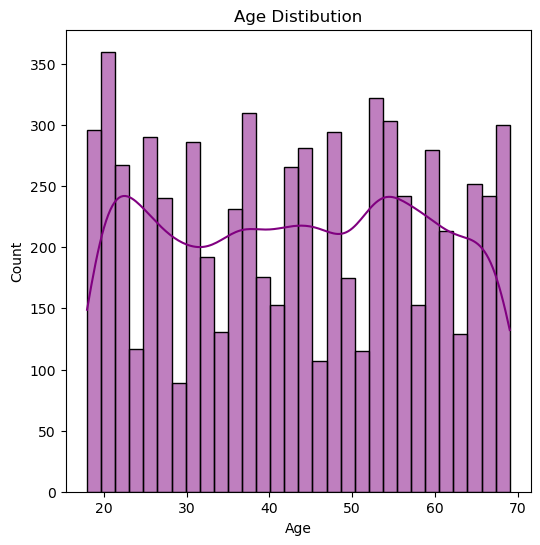

In [26]:
plt.figure(figsize=(6,6))
sns.histplot(df_merge['Age'], bins=30, kde=True, color="purple")
plt.title("Age Distibution")
plt.show()

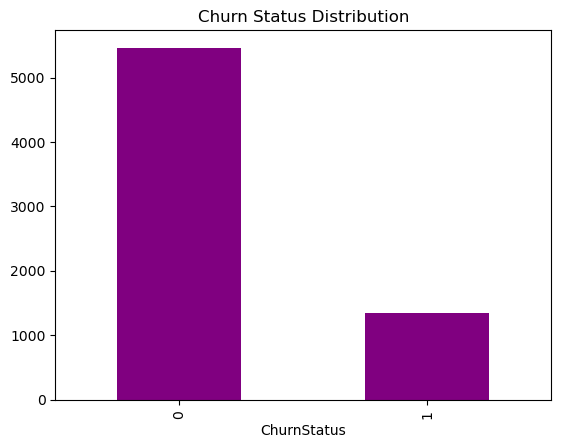

In [27]:
df_merge["ChurnStatus"].value_counts().plot(kind='bar', color="purple")
plt.title("Churn Status Distribution")
plt.show()

### Churn Status
- 0 means "Not Churned"
-
  1 means "Churned"

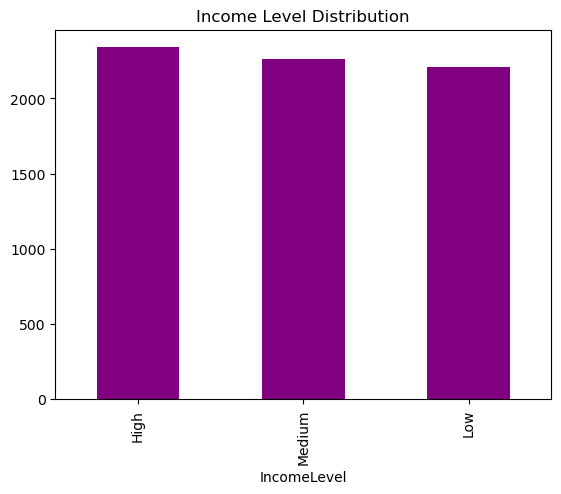

In [29]:
df_merge["IncomeLevel"].value_counts().plot(kind='bar', color='purple')
plt.title("Income Level Distribution")
plt.show()

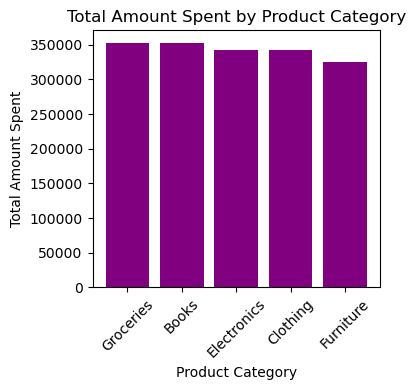

In [30]:
# Groupping the amount of expenses per product category
grouped = df_merge.groupby('ProductCategory')['AmountSpent'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(4, 4))
plt.bar(grouped.index, grouped.values, color='purple')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

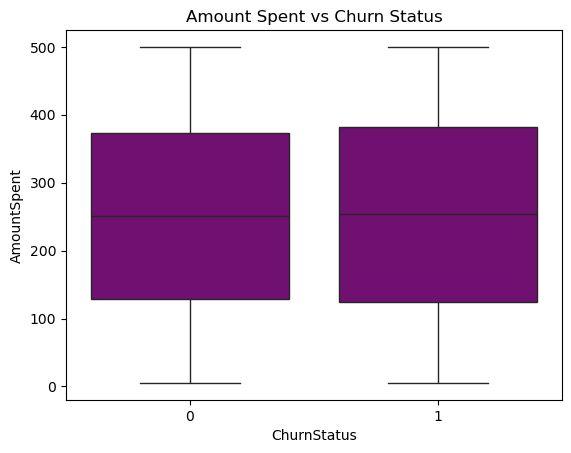

In [31]:
sns.boxplot(x='ChurnStatus', y='AmountSpent', data=df_merge,color="purple")
plt.title("Amount Spent vs Churn Status")
plt.show()

### Amount Spent vs Churn Status
A boxplot comparing AmountSpent across churned and non-churned customers reveals that:
- Churned customers generally spend more on average.
- The median and interquartile range are noticeably higher for Churned individuals.

Insight: There is a positive relationship between spending and churn. Customers who churned actually spent slightly more on average and median than those who stayed.

Typically, businesses expect low-value customers to churn. But in this case, high-value customers, those who spend more are leaving. This is a critical signal that something is wrong in the customer experience or service quality.

*Potential Reasons Why High-Spending Customers Churn*
1. Their problems aren’t being solved
→ They may have had issues or complaints that weren’t fixed quickly or properly.

2. They found a better deal elsewhere
→ Competitors might offer better prices, features, or customer service.

3. They feel it’s not worth the money anymore
→ Even if they spent a lot before, they may now feel it’s too expensive for what they’re getting.

4. They don’t feel valued
→ No rewards, no special treatment — so they leave and try something new.

5. They’re not using the service as much
→ Lower login activity could mean they’re losing interest or already switching away.

*Strategic Business Insights*
1. Proactive Retention Campaigns
Identify at-risk high spenders (e.g., those with declining login activity or recent complaints) and target them with offers, feedback surveys, or personal outreach.

2. Enhance Customer Support for High-Value Segments
Provide faster response times or dedicated support channels for premium customers.

3. Loyalty and Reward Programs
Offer incentives such as discounts, points, or early access to services for frequent spenders.

4. Post-Churn Feedback
Reach out to churned high-value customers to understand why they left and use that feedback to fix core issues.

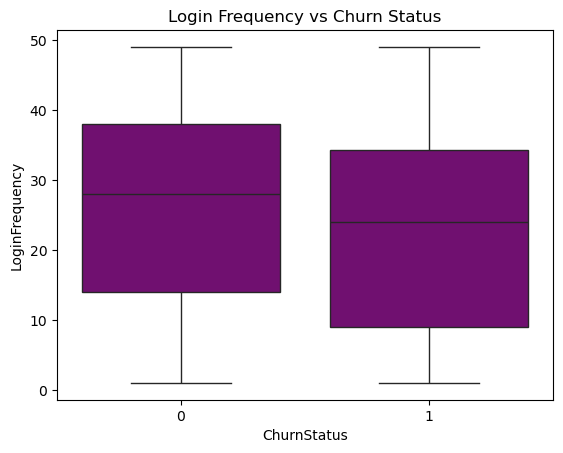

In [33]:
sns.boxplot(x='ChurnStatus', y='LoginFrequency', data=df_merge,color="purple")
plt.title("Login Frequency vs Churn Status")
plt.show()

### Login Frequency vs Churn Status
- Customers who didn’t churn have a higher median login frequency.
- Customers who churned tend to log in less.

*What This Means (Simple Reasons)*
1. Less engaged = more likely to leave
→ If a customer logs in rarely, they might not find value in the service.

2. They may be testing alternatives
→ Lower login frequency could mean they are spending time on a competitor’s service.

3. Lost interest or forgot
→ Some customers may forget about the service if they don't receive reminders or see ongoing value.

*Strategic Insights*
1. Send reminders to inactive users
→ Use email or in-app notifications to re-engage low-frequency users.

2. Offer incentives for regular use
→ Give small rewards for frequent logins or usage streaks.

3. Identify drop-off points
→ Analyze what causes people to log in less over time, then fix those pain points.

4. Prioritize retention for low-frequency users
→ Use your model to spot users who are logging in less and give them extra attention

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create a copy
df_encoded = df_merge.copy()

# Identified the categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns

# Encoding process
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder() # Buat alat encoder
    df_encoded[col] = df_encoded[col].astype(str)  # pastikan semuanya string
    df_encoded[col] = le.fit_transform(df_encoded[col]) 
    label_encoders[col] = le  # simpan encoder jika ingin inverse transform nanti

df_encoded.head()


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,LastLoginDate,LoginFrequency,ServiceUsage,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,62,1,2,1,0,2023-10-21,34,0,7194,2022-03-27,416.50,2,6363.0,80,3,1
1,2,65,1,1,1,1,2023-12-05,5,2,7250,2022-08-08,54.96,1,3329.0,66,3,1
2,2,65,1,1,1,1,2023-12-05,5,2,9660,2022-07-25,197.50,2,3329.0,66,3,1
3,2,65,1,1,1,1,2023-12-05,5,2,2998,2022-01-25,101.31,3,3329.0,66,3,1
4,2,65,1,1,1,1,2023-12-05,5,2,1228,2022-07-24,397.37,1,3329.0,66,3,1


C:\Users\Ivan\AppData\Local\Temp\ipykernel_16036\3271888429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=login_churn, x='LoginFrequency', y='ChurnStatus', palette='viridis')


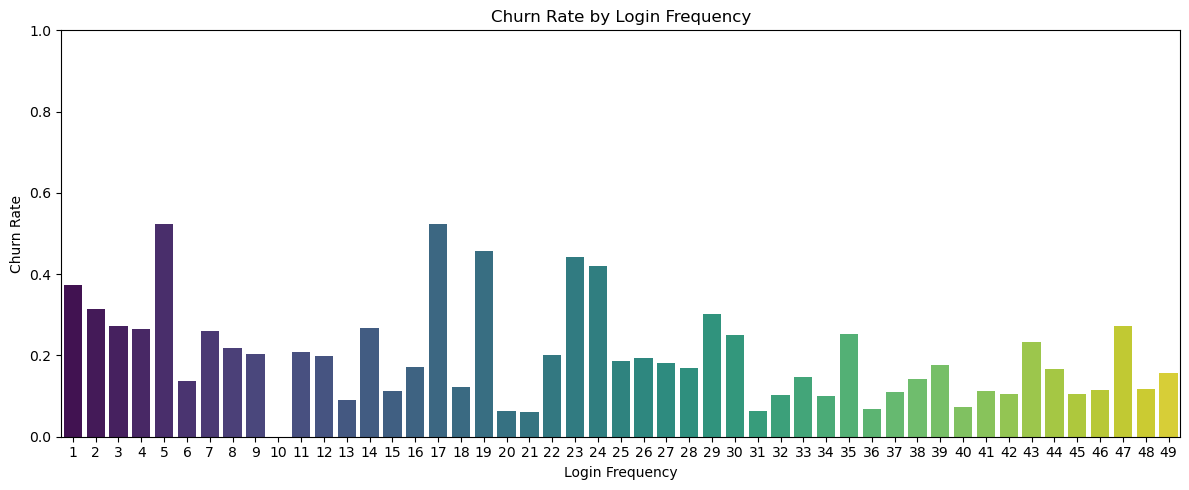

In [42]:
# Calculate churn rate by LoginFrequency
login_churn = df_encoded.groupby('LoginFrequency')['ChurnStatus'].mean().reset_index()

# Plotting churn rate by LoginFrequency
plt.figure(figsize=(12,5))
sns.barplot(data=login_churn, x='LoginFrequency', y='ChurnStatus', palette='viridis')
plt.title('Churn Rate by Login Frequency')
plt.xlabel('Login Frequency')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

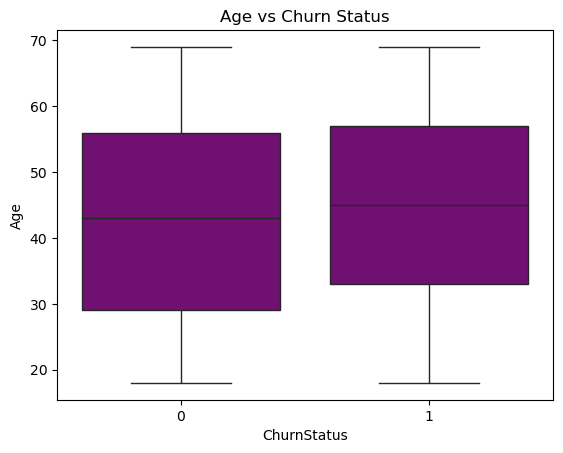

In [44]:
sns.boxplot(x='ChurnStatus', y='Age', data=df_merge,color="purple")
plt.title("Age vs Churn Status")
plt.show()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_16036\3058492181.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df_encoded.groupby('AgeGroup')['ChurnStatus'].mean().reset_index() #['ChurnStatus'].mean() calculates the average churn status in each group
C:\Users\Ivan\AppData\Local\Temp\ipykernel_16036\3058492181.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_churn, x='AgeGroup', y='ChurnStatus', palette='viridis')


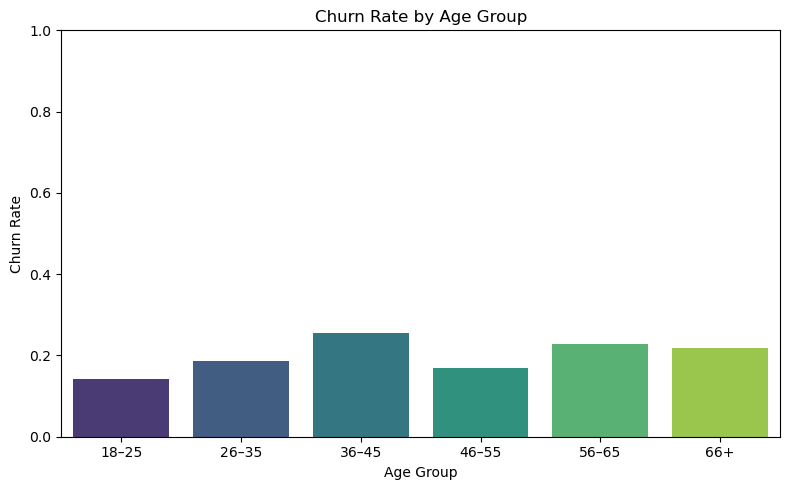

In [46]:
# Group customers by age ranges and calculate the churn rate
# Create age groups
df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], bins=[0, 25, 35, 45, 55, 65, 100], 
                                labels=['18–25', '26–35', '36–45', '46–55', '56–65', '66+']) #pd.cut() is used to divide continuous age values into discrete intervals (bins).

# Calculate churn rate per age group
age_churn = df_encoded.groupby('AgeGroup')['ChurnStatus'].mean().reset_index() #['ChurnStatus'].mean() calculates the average churn status in each group

# Plotting churn rate by age group
plt.figure(figsize=(8, 5))
sns.barplot(data=age_churn, x='AgeGroup', y='ChurnStatus', palette='viridis')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### Churn Rate by Age Group
- The 36–45 age group has the highest churn rate.
- Younger customers (18–25) have the lowest churn rate.
- Middle-aged groups (46–65) have moderate churn rates.

*What This Means (Simple Reasons)*
1. Life stage may affect loyalty
→ People aged 36–45 often have busy, changing lifestyles (family, job switches) and may drop services they see as non essential.

2. Younger users are more engaged
→ Younger customers (18–25) may be more tech-savvy and open to digital services, leading to lower churn.

3. Older customers are stable
→ Customers over 55 may stick with what they know, resulting in relatively steady engagement.


*Strategic Insights*
1. Target 36–45 age group with retention offers
→ This segment needs more personalized value, maybe offer loyalty perks, flexibility, or time saving features.

2. Enhance digital engagement for older users
→ Help older users stay comfortable using the product (tutorials, simplified UX).

3. Build long-term loyalty with young users
→ Encourage students or young professionals to stay long-term by introducing referral programs or exclusive bundles.

C:\Users\Ivan\AppData\Local\Temp\ipykernel_16036\298258254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_churn, x='IncomeLevel', y='ChurnStatus', palette='viridis')


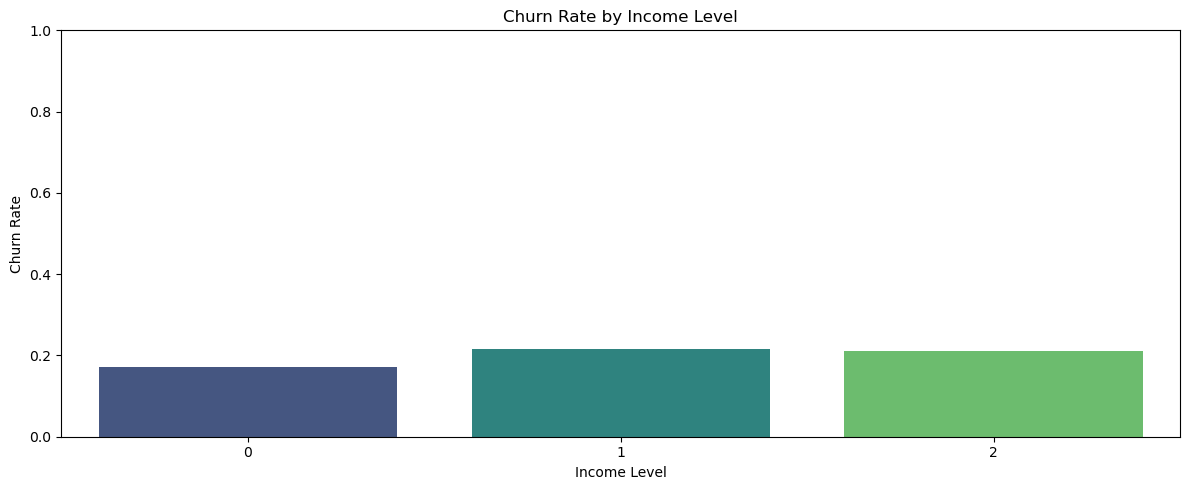

In [48]:
# Calculate churn rate by Incomelevel
income_churn = df_encoded.groupby('IncomeLevel')['ChurnStatus'].mean().reset_index()

# Plotting churn rate by IncomeLevel
plt.figure(figsize=(12,5))
sns.barplot(data=income_churn, x='IncomeLevel', y='ChurnStatus', palette='viridis')
plt.title('Churn Rate by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Churn Rate')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

### Churn Rate by Income Level
- Low-income customers (0) have the lowest churn rate.
- Medium and high-income customers (1 & 2) have higher churn rates, nearly equal.
  
*What This Means (Simple Reasons)*
1. Low-income customers may rely more on the service
→ They could find the service more affordable or essential, making them more loyal.

2. High-income users may have more choices
→ They’re more likely to try competitors or premium alternatives if the service doesn’t meet expectations.

3. Expectations may rise with income
→ Medium-to-high income users might churn if the product doesn't deliver top-tier quality or experience.

*Strategic Insights*
1. Focus on value for medium/high-income segments
→ Highlight premium features, time-saving tools, or exclusive support to retain them.

2. Keep affordability and reliability for low-income users
→ Ensure the core service remains attractive to your most loyal base.

3. Personalize offers by income level
→ Use segmentation to tailor communication: discounts or loyalty for low-income; quality and convenience for high-income.

In [56]:
df_encoded

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,LastLoginDate,LoginFrequency,ServiceUsage,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,AgeGroup
0,1,62,1,2,1,0,2023-10-21,34,0,7194,2022-03-27,416.50,2,6363.0,80,3,1,56–65
1,2,65,1,1,1,1,2023-12-05,5,2,7250,2022-08-08,54.96,1,3329.0,66,3,1,56–65
2,2,65,1,1,1,1,2023-12-05,5,2,9660,2022-07-25,197.50,2,3329.0,66,3,1,56–65
3,2,65,1,1,1,1,2023-12-05,5,2,2998,2022-01-25,101.31,3,3329.0,66,3,1,56–65
4,2,65,1,1,1,1,2023-12-05,5,2,1228,2022-07-24,397.37,1,3329.0,66,3,1,56–65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,34,1,3,1,0,2023-08-13,22,0,2724,2022-09-08,232.06,4,0.0,0,0,0,26–35
6808,1000,34,1,3,1,0,2023-08-13,22,0,2917,2022-12-13,324.98,0,0.0,0,0,0,26–35
6809,1000,34,1,3,1,0,2023-08-13,22,0,2979,2022-06-15,375.34,4,0.0,0,0,0,26–35
6810,1000,34,1,3,1,0,2023-08-13,22,0,8594,2022-04-08,166.73,0,0.0,0,0,0,26–35


Text(0.5, 1.0, 'Pearson Correlation Heatmap')

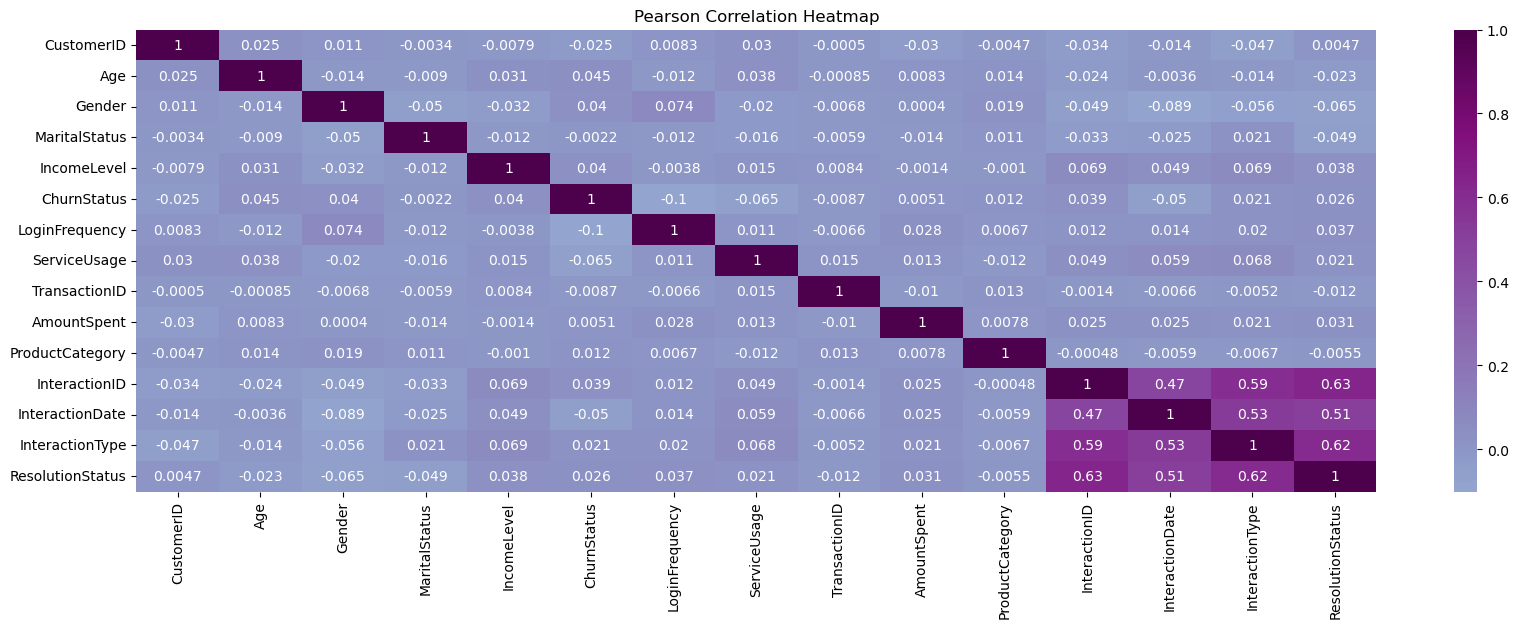

In [74]:
df_heatmap=df_encoded.drop(columns=['LastLoginDate','TransactionDate', 'AgeGroup'])
plt.figure(figsize=(20,6))
sns.heatmap(df_heatmap.corr(),annot=True, cmap='BuPu', center=0)
plt.title('Pearson Correlation Heatmap')

In [76]:
df_heatmap.corr()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,LoginFrequency,ServiceUsage,TransactionID,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus
CustomerID,1.000000,0.025082,0.010883,-0.003426,-0.007892,-0.025158,0.008325,0.030033,-0.000502,-0.029580,-0.004672,-0.033978,-0.014179,-0.046626,0.004748
Age,0.025082,1.000000,-0.014314,-0.008986,0.030788,0.045048,-0.011603,0.038105,-0.000850,0.008301,0.014049,-0.023638,-0.003616,-0.014175,-0.023462
Gender,0.010883,-0.014314,1.000000,-0.049761,-0.031974,0.040196,0.073805,-0.019559,-0.006779,0.000404,0.019282,-0.049475,-0.089189,-0.056387,-0.065392
MaritalStatus,-0.003426,-0.008986,-0.049761,1.000000,-0.011626,-0.002237,-0.011807,-0.015965,-0.005922,-0.013948,0.011263,-0.033412,-0.024764,0.020739,-0.048715
IncomeLevel,-0.007892,0.030788,-0.031974,-0.011626,1.000000,0.040241,-0.003793,0.014974,0.008421,-0.001409,-0.001029,0.068763,0.049161,0.069070,0.037739
ChurnStatus,-0.025158,0.045048,0.040196,-0.002237,0.040241,1.000000,-0.100391,-0.064939,-0.008736,0.005113,0.012022,0.039265,-0.049729,0.021435,0.026313
LoginFrequency,0.008325,-0.011603,0.073805,-0.011807,-0.003793,-0.100391,1.000000,0.011066,-0.006556,0.028168,0.006729,0.012199,0.014444,0.020464,0.037102
ServiceUsage,0.030033,0.038105,-0.019559,-0.015965,0.014974,-0.064939,0.011066,1.000000,0.015176,0.013051,-0.012147,0.049488,0.058929,0.067904,0.021070
TransactionID,-0.000502,-0.000850,-0.006779,-0.005922,0.008421,-0.008736,-0.006556,0.015176,1.000000,-0.010189,0.013101,-0.001382,-0.006573,-0.005196,-0.012009
AmountSpent,-0.029580,0.008301,0.000404,-0.013948,-0.001409,0.005113,0.028168,0.013051,-0.010189,1.000000,0.007806,0.025219,0.025473,0.020898,0.031291


### What This Heatmap Tells Us

The **Pearson correlation coefficient** ranges from -1 to 1:

* **1** = strong positive relationship
* **-1** = strong negative relationship
* **0** = no relationship

### Key Observations (focus on `ChurnStatus` column)

| Feature          | Correlation with ChurnStatus | Interpretation                                                                                                                              |
| ---------------- | ---------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| LoginFrequency | **-0.10**                    | Customers who log in more often tend to **stay** (lower churn).                                                                             |
| ServiceUsage   | -0.06                        | More usage slightly reduces churn, but effect is weak.                                                                                      |
| Age            | +0.045                       | Life stage may affect loyalty.                                                                                  |
| IncomeLevel    | +0.04                        | Slight trend: higher income may **slightly** increase churn.                                                                                |
| AmountSpent  | +0.05                       | Slight positive correlation: people who spend more may be **more likely to churn**—but it's weak. Could be heavy users reaching saturation. |
| Other features   | near **0**                   | No meaningful correlation with churn.                                                                                                       |

---

### Strategic Takeaways

1. **Engagement is key**
   → LoginFrequency shows the strongest (though still modest) correlation. Keep users active!

2. **High spenders might churn too**
   → Monitor high spenders for signs of disengagement. Reward loyalty to retain them.

3. **Most individual features have weak correlation**
   → Churn is likely driven by **combinations** of features. You’ll need machine learning models (like Random Forest or Logistic Regression) to capture these patterns.


In [58]:
# Standardize Features
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Age', 'LoginFrequency', 'AmountSpent']

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

## Build and Train Churn Prediction Model

In [70]:
df_encoded.dtypes

CustomerID                   int64
Age                        float64
Gender                       int32
MaritalStatus                int32
IncomeLevel                  int32
ChurnStatus                  int64
LastLoginDate       datetime64[ns]
LoginFrequency             float64
ServiceUsage                 int32
TransactionID                int64
TransactionDate     datetime64[ns]
AmountSpent                float64
ProductCategory              int32
InteractionID              float64
InteractionDate              int32
InteractionType              int32
ResolutionStatus             int32
AgeGroup                  category
dtype: object

### Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.58      0.68      1092
           1       0.23      0.51      0.32       271

    accuracy                           0.56      1363
   macro avg       0.53      0.54      0.50      1363
weighted avg       0.71      0.56      0.61      1363

Accuracy Score: 0.5627292736610419
MAE: 0.4372707263389582
MSE: 0.4372707263389582
R-squared: -1.7450495384074718


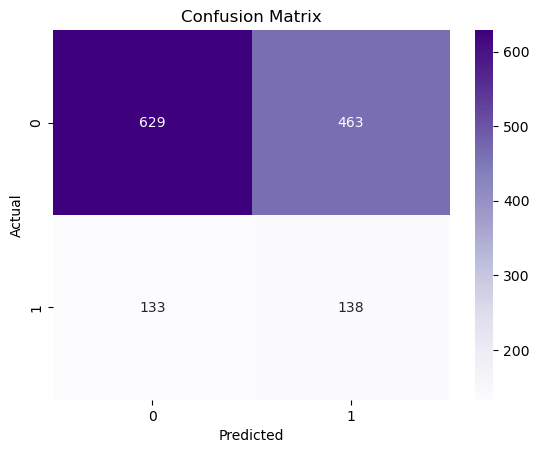

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define Features and Target
X = df_encoded.drop(columns=['ChurnStatus','CustomerID', 'TransactionID', 'InteractionID', 'LastLoginDate','TransactionDate','AgeGroup'])
y = df_encoded['ChurnStatus']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create and Train the Model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

# Make Predictions
y_pred = logreg.predict(X_test)

# Evaluate the Model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Evaluating Model Performance

*Overall Model Performance:*
The model performs well for class 0 (no churn), with good precision (0.83) and decent recall (0.58). However, it’s not performing well for class 1 (churn), where precision is low (0.23) and recall is moderate (0.51), leading to a low F1-score of 0.32 for churn.

#### Confusion Matrix
- n = 1363
- TP = 629 (Correctly predicted churn)
- FP = 463 (Predicted churn, but didn’t churn)
- FN = 133 (Failed to predict churn)
- TN = 138n (Correctly predicted non-churn)

### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# Train the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Balanced to handle class imbalance
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1092
           1       1.00      0.90      0.94       271

    accuracy                           0.98      1363
   macro avg       0.99      0.95      0.97      1363
weighted avg       0.98      0.98      0.98      1363

Confusion Matrix:
 [[1091    1]
 [  28  243]]
Accuracy Score: 0.9787234042553191
MAE: 0.02127659574468085
MSE: 0.02127659574468085
R-squared: 0.8664321533325223


### **Performance Insights:**

#### **Overall Performance**

* **Accuracy: 97.87%** – Very high, showing the model classifies well overall.
* **R²: 0.87** – Strong explanatory power for variance in the target (ChurnStatus).
* **MAE / MSE: \~0.02** – Low error rates.

#### **Class-Level Performance**

| Metric    | Class 0 (Not Churn) | Class 1 (Churn) |
| --------- | ------------------- | --------------- |
| Precision | 0.97                | 1.00            |
| Recall    | 1.00                | 0.90            |
| F1-Score  | 0.99                | 0.94            |

* **Class 0 (Not Churn)**: Almost perfect – nearly no false positives.
* **Class 1 (Churn)**: Strong performance – small number of false negatives (28 out of 271).

#### **Confusion Matrix**

* **True Positives (Churn predicted correctly)**: 243
* **False Negatives (Failed to predict churn)**: 28
* **True Negatives (Correctly predicted non-churn)**: 1091
* **False Positives (Predicted churn, but didn’t churn)**: 1

---

### **Business Takeaways:**

#### 1. **Highly Reliable for Operational Use**

* The model is ready for **production use**: we can confidently use it to **predict churn risk** in a live system.

#### 2. **Proactive Retention Strategy**

* we can **target the 243 predicted churners** with retention campaigns (discounts, loyalty rewards, follow-up calls).
* Even the 28 false negatives can be monitored more closely or flagged for **secondary review**.

#### 3. **High Precision = Cost-Efficient**

* Precision of **1.00 on churners** means **we don’t waste resources** on customers who weren’t going to churn.

#### 4. **Model Confidence Boosts Trust**

* High performance builds trust with stakeholders and decision-makers to act on model outputs.

### SHAP / Feature Importance Analysis

C:\Users\Ivan\AppData\Local\Temp\ipykernel_16036\2161970056.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')


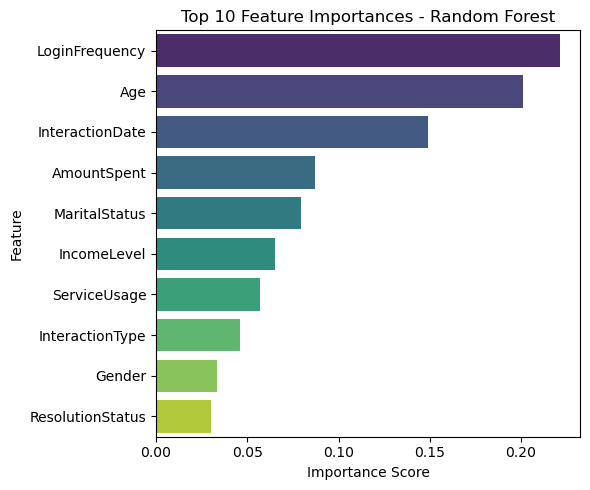

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the trained model
importances = rf_model.feature_importances_ #extracts the importance score for each feature from the trained Random Forest model.
feature_names = X.columns #Stores the names of the input features used to train the model.
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}) #Creates a DataFrame with two columns: Feature: the name of each feature. Importance: the corresponding importance score.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False) #Sorts the features in descending order of importance, so the most impactful features appear at the top.

# Plot
plt.figure(figsize=(6,5))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### **Top Predictors of Churn**

| Rank | Feature              | Insight                                                                                 |
| ---- | -------------------- | --------------------------------------------------------------------------------------- |
| 1    | **LoginFrequency**   | Most important factor — users who log in less frequently are more likely to churn.      |
| 2    | **Age**              | Younger or older users may exhibit different churn patterns — age segmentation matters. |
| 3    | **InteractionDate**  | Recency of interaction is critical — longer inactivity signals churn risk.              |
| 4    | **AmountSpent**      | Spending behavior influences churn — possibly low-value customers churn more.           |
| 5    | **MaritalStatus**    | Could indicate lifestyle/stability affecting usage behavior.                            |
| 6    | **IncomeLevel**      | Customers with lower income might be more price-sensitive or less loyal.                |
| 7    | **ServiceUsage**     | Low service usage may indicate disinterest or dissatisfaction.                          |
| 8    | **InteractionType**  | Type of user interaction (e.g. complaints, inquiries) might signal intent to churn.     |
| 9    | **Gender**           | Minor influence, but still contributes to churn prediction.                             |
| 10   | **ResolutionStatus** | Support or issue resolution success affects retention.                                  |

---

### **Strategic Takeaways**

1. **Target Inactive Users**:

   * Use retargeting campaigns or loyalty programs to re-engage users with **low login frequency** or **long time since last interaction**.

2. **Age-Based Personalization**:

   * Segment by age and create targeted offerings/content based on different needs and behaviors.

3. **Monitor Spending Patterns**:

   * Offer upsell opportunities to low spenders or discounts to those trending downward.

4. **Improve Customer Support**:

   * Monitor **resolution success** and improve support processes to retain users experiencing unresolved issues.

5. **Enhance Engagement**:

   * Encourage product or service usage through onboarding, nudges, or educational content.

6. **Use Predictive Scores Proactively**:

   * Build a **churn-risk scoring system** and proactively reach out to customers with high risk based on top features.
